In [54]:
#!pip install pandas_profiling dtale klib 

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
print(pd.__version__)



2.2.1


In [182]:
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_extraction import DictVectorizer

#from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

In [57]:
data=pd.read_csv('Housing.csv')

In [58]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [60]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [61]:
data['guestroom'].mode()[0]

'no'

In [62]:
data.isna().sum(
)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [63]:
#result=data['Gender'].groupby('Gender').count()
data['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [64]:
g=pd.DataFrame()
l=data['furnishingstatus'].value_counts()

l=l.to_frame()
l.reset_index(inplace=True)
fig=px.bar(l,x='furnishingstatus',y='count',
          labels={'index':'furnishingstatus','furnishingstatus':'No. of semifurnished, unfurnished and furnished'},
          title='No. of furnished room vs  No. of unfurnished vs No. of semifurnished')
fig.show()

In [65]:
#same as above
result=data[['bedrooms','bathrooms']].groupby('bedrooms').agg('count')
result.reset_index(inplace=True)
result

,bedrooms,bathrooms
0,1,2
1,2,136
2,3,300
3,4,95
4,5,10
5,6,2


In [66]:
#same as above
result=pd.crosstab(data.furnishingstatus,data.bedrooms, margins = True)
result.reset_index(inplace=True)
result

bedrooms,furnishingstatus,1,2,3,4,5,6,All
0,furnished,1,29,76,29,4,1,140
1,semi-furnished,0,50,127,48,2,0,227
2,unfurnished,1,57,97,18,4,1,178
3,All,2,136,300,95,10,2,545


In [67]:
#histogram for furnishingstatus 
fig = px.histogram(data, x="furnishingstatus", 
                   labels={'furnishingstatus':'furnishing status'},
                  title='Histogram showing furnishing status')

fig.show()

In [68]:
#histogram for guestroom 
fig = px.histogram(data, x="guestroom", 
           labels = {'guestroom':'guest room'}        )
fig.show()

In [69]:
#data['guestroom'].skew()

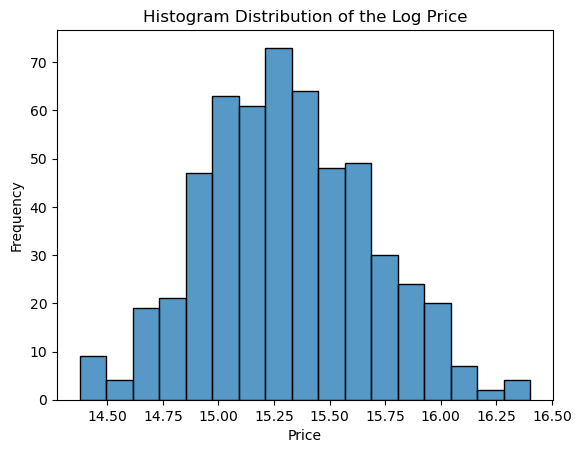

0.14086281102108905


In [152]:
#Normalising the price with the log function
#df['price_log'] = np.log(df['price'])
## log transformation 
log_price = np.log1p(data['price'])

sns.histplot(log_price)

plt.title('Histogram Distribution of the Log Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

#fig = px.histogram(df, x="price_log", 
                 #  title='Histogram show price log of houses')
#fig.show()
print(log_price.skew())

In [70]:
#histogram for price 
fig = px.histogram(data, x="price", 
                   title='Histogram show price of houses'
                   )
fig.show()


In [71]:
data['price'].skew()

1.2122388370279802

In [72]:
#Normalising the price with the log function
data['price_log'] = np.log(data['price'])

fig = px.histogram(data, x="price_log", 
                   labels = {'price_log':'price log'},
                   title='Histogram show price log of houses')
fig.show()
print(data['price_log'].skew())

0.14086257299872787


In [73]:
data['mainroad'].isna().sum()

0

In [74]:
data['hotwaterheating'].unique()

array(['no', 'yes'], dtype=object)

In [75]:

data['mainroad'] = data['mainroad'].\
map({'yes': 1, 'no': 0}).astype(int)

data['guestroom'] = data['guestroom'].\
map({'yes': 1, 'no': 0}).astype(int)


data['basement'] = data['basement'].\
map({'yes': 1, 'no': 0}).astype(int)


In [76]:
data['hotwaterheating'] = data['hotwaterheating'].\
map({'yes': 1, 'no': 0}).astype(int)

data['airconditioning'] = data['airconditioning'].\
map({'yes': 1, 'no': 0}).astype(int)

data['prefarea'] = data['prefarea'].\
map({'yes': 1, 'no': 0}).astype(int)

data['furnishingstatus'] = data['furnishingstatus'].\
map({'furnished': 1, 'semi-furnished': 2,  'unfurnished': 0}).astype(int)

In [77]:
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_log
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,16.403275
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,16.321036
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2,16.321036
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,16.318175
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,16.250001


In [78]:
data['furnishingstatus'].value_counts()

furnishingstatus
2    227
0    178
1    140
Name: count, dtype: int64

In [79]:
#histogram for furnishingstatus 
fig = px.histogram(data, x="furnishingstatus", 
                   labels={'furnishingstatus':'furnishing status'},
                  title='Histogram showing furnishing status')

fig.show()

In [80]:
#histogram for guestroom 
fig = px.histogram(data, x="guestroom", 
                   )
fig.show()

In [81]:
data['guestroom'].unique()

array([0, 1])

In [82]:
corr_matrix = data.corr() 

corr_matrix['price']

price               1.000000
area                0.535997
bedrooms            0.366494
bathrooms           0.517545
stories             0.420712
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
airconditioning     0.452954
parking             0.384394
prefarea            0.329777
furnishingstatus    0.190086
price_log           0.969010
Name: price, dtype: float64

# Starting with modeling

In [133]:
data.head(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_log
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,16.403275
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,16.321036
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2,16.321036
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,16.318175
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,16.250001
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,2,16.199676
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,2,16.132984
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0,16.132984
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,1,16.105010
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0,16.097893


In [153]:
df_train_full, df_test = train_test_split(data, test_size=0.2, random_state=11)

df_train, df_valid = train_test_split(df_train_full, test_size=0.20, random_state=11) 

print(f'Train set {len(df_train)}')
print(f'Valid set {len(df_valid)}')
print(f'Test set {len(df_test)}')


Train set 348
Valid set 88
Test set 109


In [154]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'price_log'],
      dtype='object')

In [155]:
y_train = np.log1p(df_train['price']).values
y_valid = np.log1p(df_valid['price']).values
y_test = np.log1p(df_test['price']).values
y_train_full = np.log1p(df_train_full['price']).values

In [156]:
del df_train['price']
del df_valid['price']
del df_test['price']
del df_train_full['price']


In [158]:
df_test.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus', 'price_log'],
      dtype='object')

In [159]:
baseline_features = ['area','bedrooms','stories','airconditioning','parking','prefarea','furnishingstatus']

df_train_bl = df_train[baseline_features]


In [160]:
X_train_bl = df_train_bl.values
X_train_bl

array([[6480,    3,    4, ...,    2,    0,    0],
       [6720,    3,    1, ...,    0,    0,    0],
       [2400,    3,    1, ...,    0,    0,    2],
       ...,
       [7000,    3,    2, ...,    0,    0,    0],
       [3650,    3,    2, ...,    2,    0,    2],
       [8875,    3,    1, ...,    1,    0,    2]], dtype=int64)

In [163]:
# train the model
model = LinearRegression()
model.fit(X_train_bl, y_train)

LinearRegression()

In [164]:
## generate validation baseline features 
df_valid_bl = df_valid[baseline_features]

## convert dfframe into numpy array
X_valid_bl = df_valid_bl.values 

In [165]:
X_valid_bl

array([[ 3185,     2,     1,     0,     2,     0,     0],
       [ 6600,     4,     1,     0,     0,     1,     2],
       [ 5500,     4,     2,     0,     0,     0,     2],
       [ 4160,     3,     3,     0,     0,     0,     0],
       [ 3500,     4,     2,     0,     2,     0,     1],
       [ 2610,     4,     2,     0,     0,     0,     2],
       [ 3000,     2,     2,     0,     0,     0,     1],
       [ 7231,     3,     2,     1,     0,     1,     2],
       [ 5020,     3,     4,     1,     0,     1,     0],
       [ 5680,     3,     2,     1,     1,     0,     2],
       [ 4130,     3,     2,     0,     2,     0,     2],
       [ 3750,     3,     1,     0,     0,     0,     0],
       [ 7085,     3,     1,     0,     2,     1,     2],
       [ 4500,     3,     4,     1,     0,     0,     0],
       [ 7420,     4,     3,     1,     2,     1,     1],
       [ 2400,     3,     2,     0,     0,     0,     0],
       [ 6325,     3,     4,     1,     1,     0,     0],
       [ 6000,

In [166]:
## generate our validation prediction
y_valid_pred = model.predict(X_valid_bl)

In [167]:
acc_score = model.score(X_valid_bl, y_valid) 
acc_score_percent = acc_score * 100
print(f'Baseline Validation Accuracy: {acc_score_percent}')

Baseline Validation Accuracy: 51.19874929529006


In [170]:
rsquared_acc = r2_score(y_valid, y_valid_pred)

In [171]:
acc_score = model.score(X_valid_bl, y_valid) 
acc_score_percent = acc_score * 100
print(f'Baseline Validation Accuracy: {acc_score_percent}')

Baseline Validation Accuracy: 51.19874929529006


In [179]:
rsquared_acc = (y_valid, y_valid_pred)

In [180]:
print(f'Mean Accuracy for the Model: {rsquared_acc *100}')

Mean Accuracy for the Model: (array([15.04807111, 15.53827733, 15.18160247, 15.39035723, 16.03905255,
       15.25059532, 14.73976986, 15.59890195, 15.72059886, 15.34590548,
       15.10749451, 15.02745183, 15.4697308 , 15.6335875 , 16.40327467,
       14.55744838, 15.81968975, 15.83838188, 14.55744838, 14.79120201,
       15.70485051, 15.36094335, 15.22527752, 15.31513383, 15.06827381,
       15.59890195, 15.05822348, 15.36094335, 15.54760866, 15.33063801,
       15.76640839, 15.47373883, 15.21669378, 15.79097965, 15.10749451,
       15.14523483, 15.03781461, 15.25059532, 15.71012756, 15.43291684,
       15.29779691, 15.02745183, 15.31357011, 15.05822348, 15.1726338 ,
       15.68885017, 15.24892726, 15.40474597, 14.61885698, 15.41186343,
       15.90031283, 15.43152698, 15.98456437, 14.71159899, 15.25059532,
       15.25059532, 15.33063801, 15.46704984, 15.65494862, 15.27853468,
       15.06827381, 14.89392048, 15.24222707, 15.16358397, 14.89392048,
       14.76716882, 15.26712462, 1

In [181]:
y_train_pred = model.predict(X_train_bl)

r2 = r2_score(y_train, y_train_pred) 

print(f'{r2*100}')

62.05031875279558


In [176]:
df_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus', 'price_log'],
      dtype='object')

In [177]:
Most_correlated_features=['area','bedrooms','stories','airconditioning','parking','prefarea','furnishingstatus']
other_features=['bathrooms','mainroad','guestroom','basement','hotwaterheating']

df_train_fe = df_train[other_features + Most_correlated_features]

## convert our dfframe to a list of dict
train_dict_fe = df_train_fe.to_dict(orient='records')

In [183]:
## create an instance of the dict vectorizer 
dv = DictVectorizer()

dv.fit(train_dict_fe)

DictVectorizer()

In [136]:
# Starting with modeling
X = data.drop('price_log' , axis = 1 )
y = data['price']


X_train ,X_test , y_train , y_test = \
train_test_split(X , y , test_size = 0.2 , random_state =110)

In [137]:
#logistic regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train , y_train)

logistic_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test , logistic_pred)*100
logistic_accuracy

3.669724770642202

In [138]:
#random forest
random_forest_model = RandomForestClassifier(n_estimators= 120)
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(y_test , random_forest_pred )*100
random_forest_accuracy

17.431192660550458

In [139]:
#K- Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test , knn_pred)*100
knn_accuracy

64.22018348623854

In [140]:
#Naive Bayes
naive_bayes_gaussian = GaussianNB()
naive_bayes_gaussian.fit(X_train, y_train)
nbg_pred = naive_bayes_gaussian.predict(X_test)
nbg_accuracy = accuracy_score(y_test , nbg_pred)*100
nbg_accuracy

80.73394495412845

In [141]:
#support vector machine
svc_model = SVC()
svc_model.fit(X_train, y_train)
svm_pred = svc_model.predict(X_test)
svm_accuracy = accuracy_score(y_test , svm_pred)*100
svm_accuracy

7.339449541284404

In [142]:
#Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)
gbc_pred = gbc_model.predict(X_test)
gbc_accuracy = accuracy_score(y_test , gbc_pred)*100
gbc_accuracy 

51.37614678899083

In [143]:
#putting models together and arranging their accuracies
model_name=['logistic regression','random forest','K-Nearest Neighbor','Naive Base',
            'support vector machine','Gradient Boosting Classifier']

model_accuracies=[logistic_accuracy,random_forest_accuracy,
                  knn_accuracy,nbg_accuracy,svm_accuracy,gbc_accuracy]

model_list=[model_name,model_accuracies]
model_df=pd.DataFrame(model_list).T#T=transpose
cols=['model','accuracy']
model_df.columns=cols
model_df.sort_values(by='accuracy',ascending=False)

,model,accuracy
3,Naive Base,80.733945
2,K-Nearest Neighbor,64.220183
5,Gradient Boosting Classifier,51.376147
1,random forest,17.431193
4,support vector machine,7.33945
0,logistic regression,3.669725


In [144]:
#saving best model to file using pickle
import pickle# you can also use joblib to save the model
model_filename = "housing_project.sav"

housing_project = pickle.dump(logistic_model, open(model_filename,'wb'))


In [145]:
X_train.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
177,5243000,6050,3,1,1,1,0,1,0,0,0,1,2
92,6405000,4800,3,2,4,1,1,0,0,1,0,0,1


In [146]:
X_train.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [147]:
X_train.head(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
177,5243000,6050,3,1,1,1,0,1,0,0,0,1,2
92,6405000,4800,3,2,4,1,1,0,0,1,0,0,1
354,3780000,8400,2,1,1,1,0,0,0,0,1,0,1
164,5390000,6710,3,2,2,1,1,1,0,0,1,1,1
11,9681000,6000,4,3,2,1,1,1,1,0,2,0,2
140,5740000,5800,3,2,4,1,0,0,0,1,0,0,0
191,5040000,10700,3,1,2,1,1,1,0,0,0,0,2
274,4340000,6450,4,1,2,1,0,0,0,0,0,0,2
78,6650000,5700,3,1,1,1,1,1,0,1,2,1,1
284,4270000,7770,2,1,1,1,0,0,0,0,1,0,1


In [150]:
#loading saved model for prediction
model_filename = "housing_project.sav"

housing_project = pickle.load(open(model_filename, 'rb'))
values=[13300000,7420,4,2,3,1,0,0,0,1,2,1,1]
df=pd.DataFrame([values])
df.columns=X_train.columns
#df
result = housing_project.predict(df)

result[0]

7350000

In [ ]:
# -*- coding: utf-8 -*-


In [ ]:
X_train.columns

In [ ]:
#import pyreadstat

# Load the .sav file
#df, meta = pyreadstat.read_sav('loan_prediction_model.sav')

# Display the data
print(df)


In [ ]:
import streamlit as st
import pandas as pd

# Load the .sav file
df = pd.read_spss('loan_prediction_model.sav')

# Display the data
st.write(df)
